<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


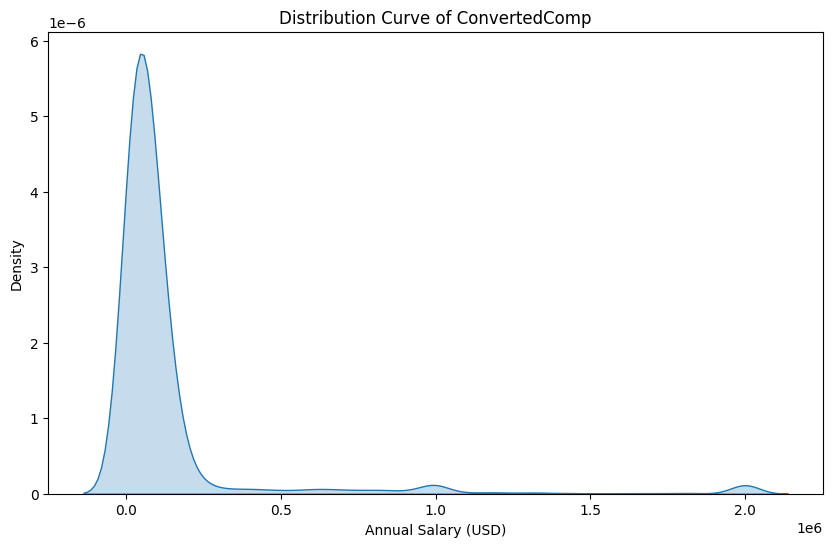

In [3]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution curve for the column ConvertedComp
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], fill=True)
plt.title('Distribution Curve of ConvertedComp')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


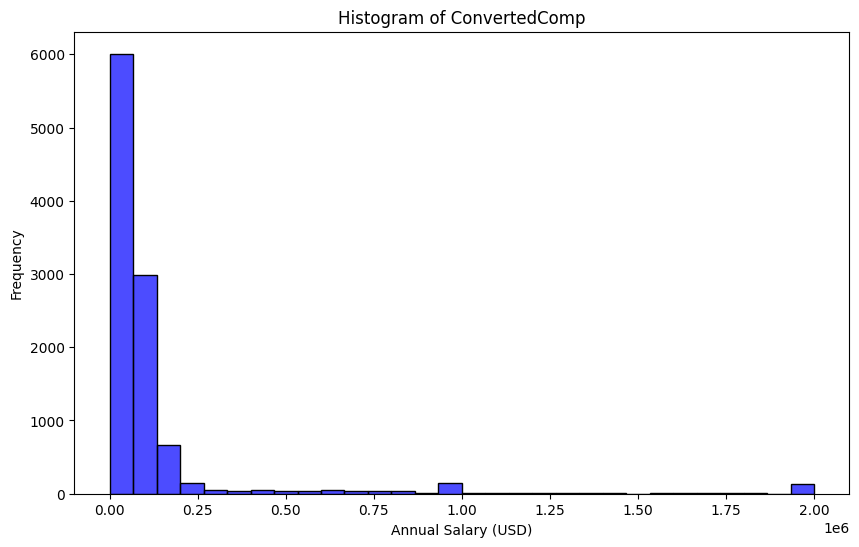

In [4]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], bins=30, kde=False, color='blue', alpha=0.7)
plt.title('Histogram of ConvertedComp')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print(f'The median of ConvertedComp is: {median_converted_comp}')

The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
count_men = df[df['Gender'] == 'Man'].shape[0]
print(f'The number of responders identified as a Man: {count_men}')

The number of responders identified as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
median_converted_comp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f'The median ConvertedComp of responders identified as a Woman is: {median_converted_comp_women}')

The median ConvertedComp of responders identified as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
five_number_summary = {
    'min': df['Age'].min(),
    'Q1': df['Age'].quantile(0.25),
    'median': df['Age'].median(),
    'Q3': df['Age'].quantile(0.75),
    'max': df['Age'].max()
}
print(f'Five-number summary for Age: {five_number_summary}')

Five-number summary for Age: {'min': np.float64(16.0), 'Q1': np.float64(25.0), 'median': np.float64(29.0), 'Q3': np.float64(35.0), 'max': np.float64(99.0)}


Plot a histogram of the column `Age`.


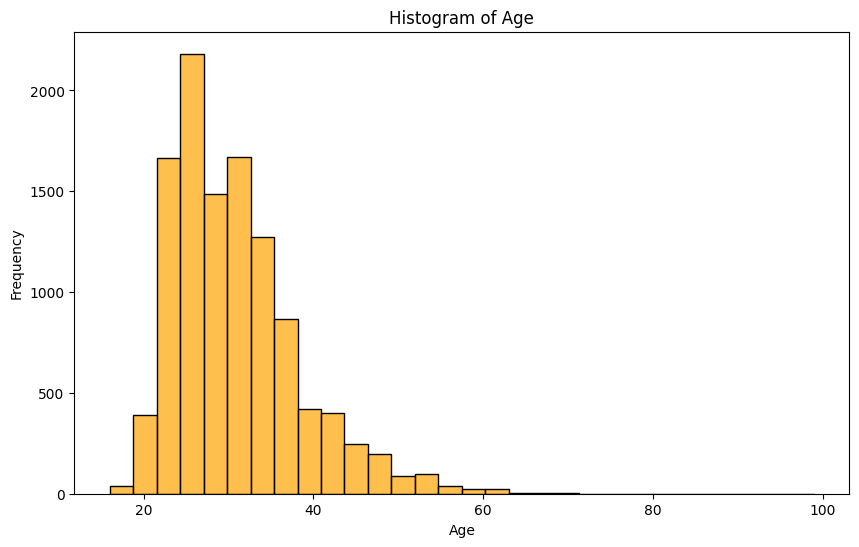

In [9]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='orange', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


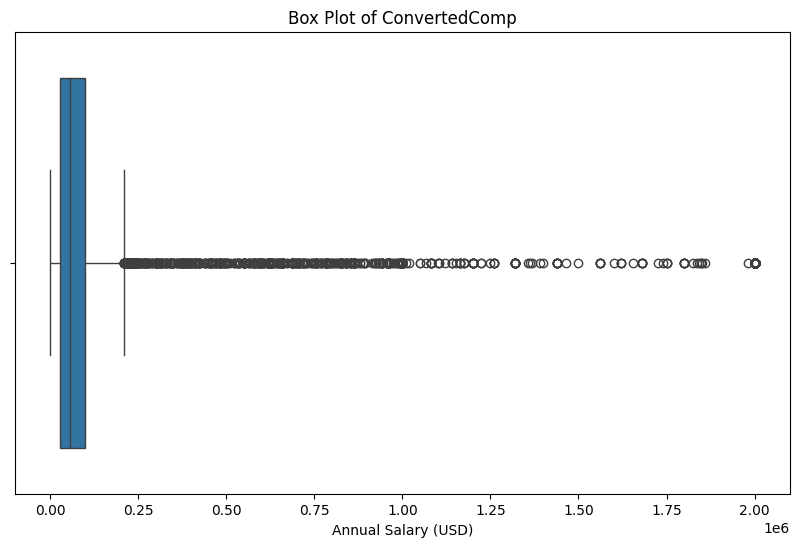

In [10]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Annual Salary (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f'Inter Quartile Range (IQR) for ConvertedComp: {IQR}')

Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -82830.0, Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
number_of_outliers = outliers.shape[0]
print(f'Number of outliers in ConvertedComp: {number_of_outliers}')

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here
df_without_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f'New DataFrame shape without outliers: {df_without_outliers.shape}')

New DataFrame shape without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
import pandas as pd
# Example: Dropping non-numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# 3. Find the correlation between Age and all other numerical columns
correlation_matrix = numeric_df.corr()
age_correlation = correlation_matrix['Age']

# 4. Display the correlation with Age
print("Correlation of Age with other numerical columns:")
print(age_correlation)

Correlation of Age with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
